In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Get the seed
import numpy as np
np.random.seed(2676)

In [2]:
# Get the data
all_data = pd.read_csv("input_data/model_ready_data.csv")

### Test/Train Split

In [3]:
# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [4]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3357 		 X Test Data Length = 1440 
 Y Train Data Length = 3357 		 Y Test Data Length = 1440


### Ridge Regression Model

In [5]:
# Set and fit model
# You can adjust the alpha parameter for regularization strength
ridge_model = Ridge(alpha=0.9) 
ridge_model.fit(train_X, train_y)

Ridge(alpha=0.9)

In [6]:
# Make predictions using the testing set
y_pred = ridge_model.predict(test_X)

### Model Prediction Statistics

In [7]:
# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
# You can adjust this based on your preference
num_folds = 5  

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(ridge_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 13475593793053.535
Coefficient of Determination (R-squared): 0.1577899489065253
Mean Absolute Error (MAE): 1672893.6882265501
Root Mean Squared Error (RMSE): 3670911.8476277166
K-fold Cross-validated R-squared: 0.13331476347617627


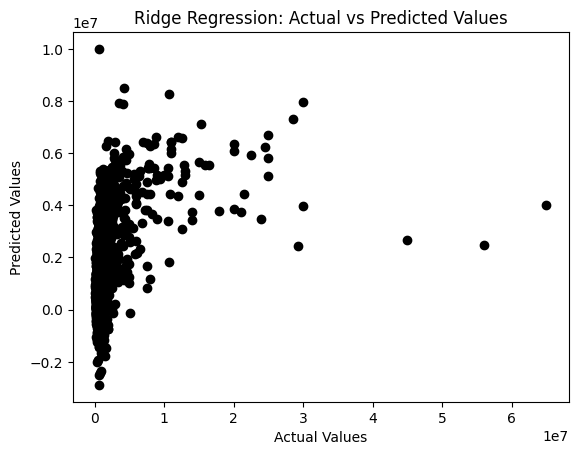

In [10]:
# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.savefig('output/ridge_reg.jpg')
plt.show()

In [9]:
coeff = pd.DataFrame(list(zip(ridge_model.feature_names_in_, ridge_model.coef_)), columns = ['Feature', 'Weight'])
coeff.sort_values('Weight')

,Feature,Weight
11,SUBLOCALITY,-265657.007128
2,TYPE,-214636.547452
3,BEDS,-112752.996525
10,LOCALITY,-106134.960520
12,STREET_NAME,-2290.024752
1,BROKERTITLE,-1114.246261
14,FORMATTED_ADDRESS,-264.798664
0,Unnamed: 0,-230.392710
13,LONG_NAME,-155.874921
15,LATITUDE,-103.899652
